In [113]:
# create a YOY RPI prediction using sarimax
#1. import the correct df from gcp
#2. follow the previous code.
!pwd

/home/nasonn/code/AltInt/Inflation_prediction/notebooks


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [115]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [116]:
final_df = pd.read_csv('../data/final_df_inc_YOY.csv',index_col=1)  
final_df.drop(columns='Unnamed: 0', inplace=True)
final_df

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY
Date,,,,,,,,,,,,,,,,,
2009-01-01,30.903838,33.424333,1.479027,1.099905,4308.390000,596.071497,2135.982324,12.472805,2.122545,3.733286,84.9,210.1,300.2,0.142993,NaN,NaN,NaN
2009-02-01,29.393166,33.617553,1.492643,1.120824,4232.114762,570.410394,2020.716905,9.467866,2.129905,3.758714,85.6,211.4,294.7,0.000000,NaN,NaN,NaN
2009-03-01,31.733352,36.826152,1.494241,1.097877,4107.840909,566.393975,2029.160819,8.064295,2.142045,3.760136,85.8,211.3,301.1,-0.377181,NaN,NaN,NaN
2009-04-01,33.990786,36.012519,1.511936,1.125327,4259.890500,588.042125,2119.383029,7.762397,2.143250,3.819600,86.0,211.5,302.9,-1.168224,NaN,NaN,NaN
2009-05-01,37.524515,38.801542,1.561252,1.131686,4434.719500,582.718727,2164.120107,7.757394,2.031900,3.873900,86.4,212.8,307.2,-1.069270,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,2.538121,2.240542,120.8,337.1,538.4,11.659490,247.890034,83.864024,11.147812
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,2.933563,2.626558,121.8,340.0,541.8,11.842105,258.900656,79.674222,10.661765
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,2.700779,2.302258,122.5,343.2,541.0,12.340426,343.541804,58.346674,11.042693


In [117]:
final_df.index = pd.to_datetime(final_df.index)

In [118]:
RPI_YOY_df = final_df[['RPI YOY']].copy()
RPI_YOY_df

,RPI YOY
Date,
2009-01-01,0.142993
2009-02-01,0.000000
2009-03-01,-0.377181
2009-04-01,-1.168224
2009-05-01,-1.069270
...,...
2022-05-01,11.659490
2022-06-01,11.842105
2022-07-01,12.340426


In [119]:
dataframes1 = {}
est_frames1 = {}

for i in range(8):
    year = 10 + i
    dataframes1[f'df_RPI_{year}_{year+5}'] = RPI_YOY_df[(year-9)*12:(year-9)*12+60]
    dataframes1[f'df_RPI_{year+5}_{year+6}'] = RPI_YOY_df[(year-9)*12+60:(year-9)*12+72]
#     placeholder for est_frames here ... will be overwritten once we have estimates
    est_frames1[f'df_RPI_{year+5}_{year+6}'] = dataframes1[f'df_RPI_{year+5}_{year+6}']
dataframes1

{'df_RPI_10_15':              RPI YOY
 Date                
 2010-01-01  3.712518
 2010-02-01  3.689688
 2010-03-01  4.448651
 2010-04-01  5.342790
 2010-05-01  5.075188
 2010-06-01  5.014058
 2010-07-01  4.779756
 2010-08-01  4.710821
 2010-09-01  4.644682
 2010-10-01  4.537037
 2010-11-01  4.709141
 2010-12-01  4.770642
 2011-01-01  5.094080
 2011-02-01  5.520073
 2011-03-01  5.346624
 2011-04-01  5.206463
 2011-05-01  5.187835
 2011-06-01  4.953146
 2011-07-01  4.964222
 2011-08-01  5.167038
 2011-09-01  5.592543
 2011-10-01  5.403012
 2011-11-01  5.158730
 2011-12-01  4.816112
 2012-01-01  3.930131
 2012-02-01  3.718115
 2012-03-01  3.569892
 2012-04-01  3.455631
 2012-05-01  3.061224
 2012-06-01  2.806122
 2012-07-01  3.152961
 2012-08-01  2.922490
 2012-09-01  2.648172
 2012-10-01  3.193277
 2012-11-01  2.976939
 2012-12-01  3.091061
 2013-01-01  3.277311
 2013-02-01  3.209671
 2013-03-01  3.280731
 2013-04-01  2.886598
 2013-05-01  3.135314
 2013-06-01  3.267163
 2013-07-01  3.1

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


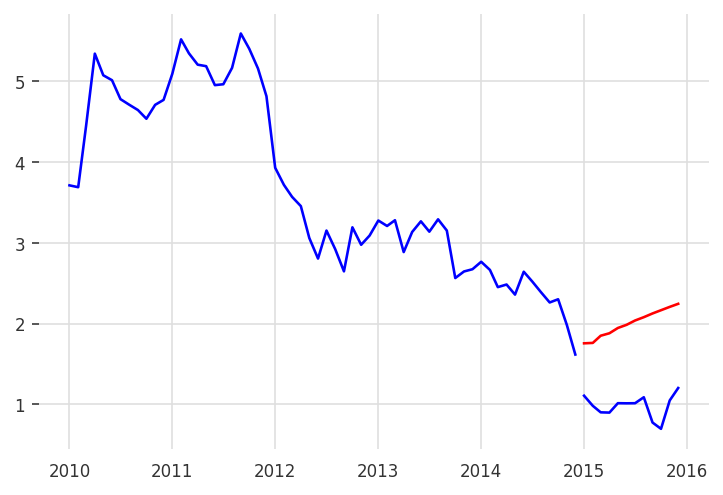

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

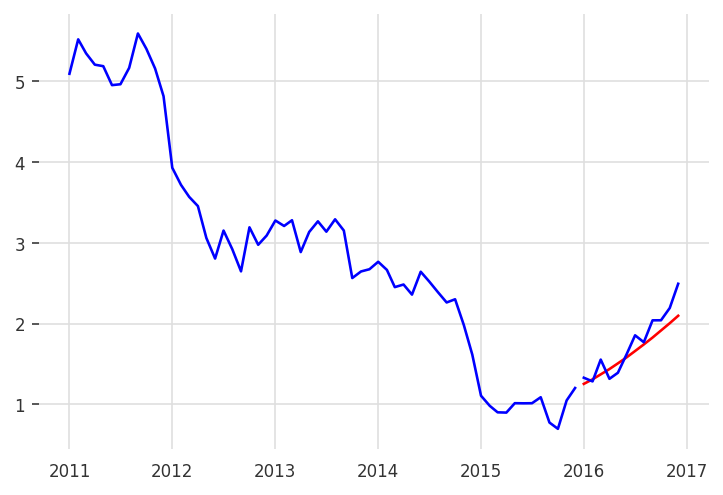

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

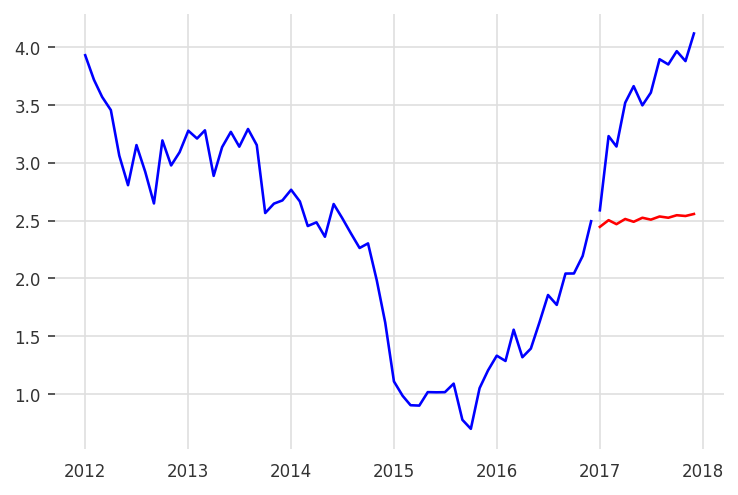

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

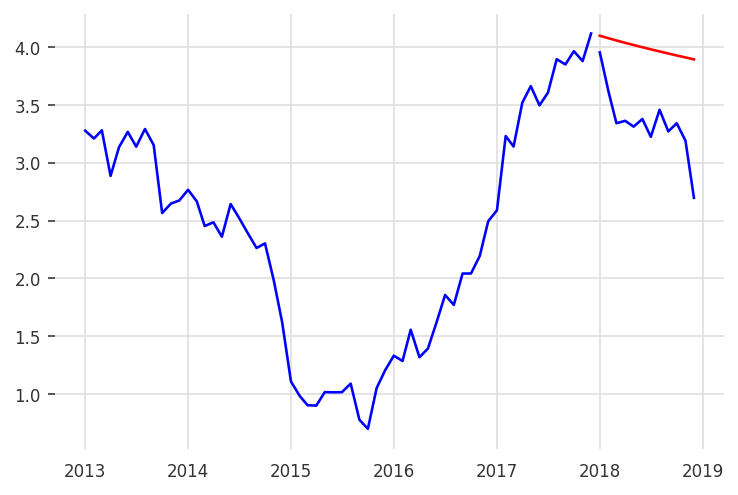

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

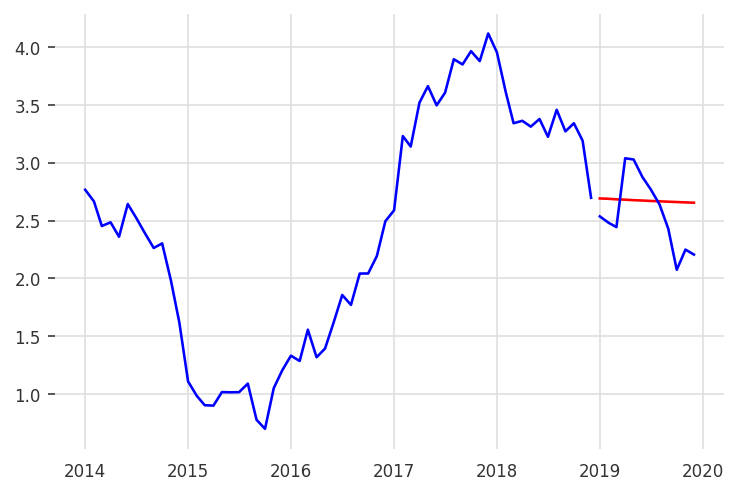

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

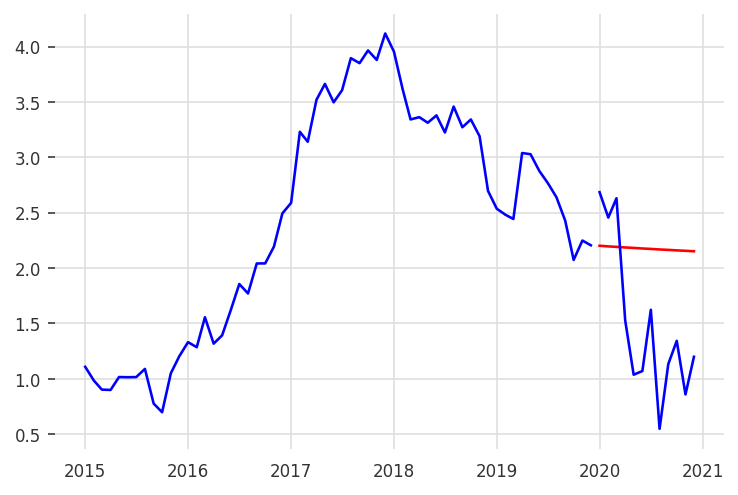

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


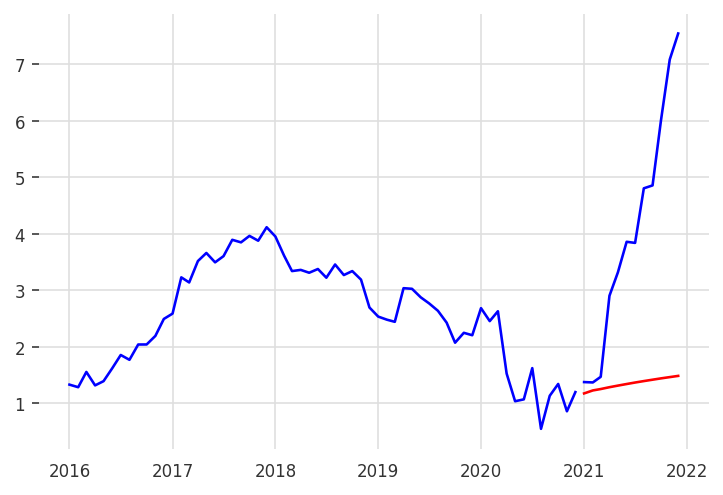

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

ValueError: x and y must have same first dimension, but have shapes (9,) and (12,)

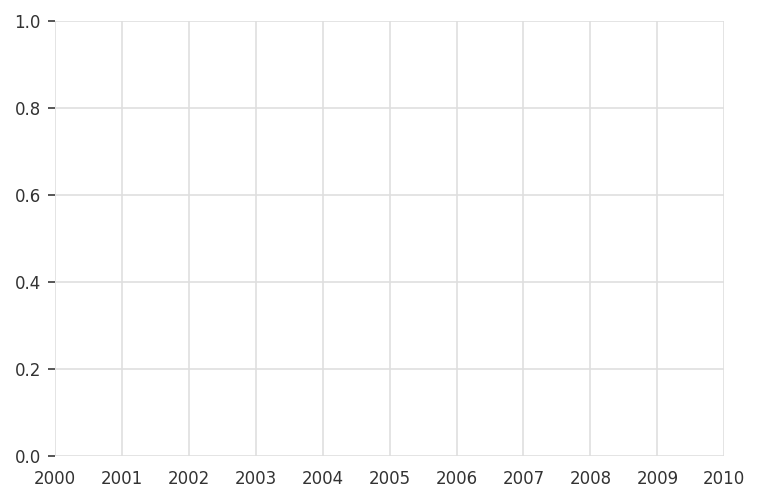

In [120]:
mape_list = []
YOY_error_0_list = []

for i in range(8):
    year = 10 + i
    df5y = dataframes1[f'df_RPI_{year}_{year+5}']
    df5y1y = dataframes1[f'df_RPI_{year+5}_{year+6}']
    
    model=sm.tsa.arima.ARIMA(df5y,order=(2, 0, 1))
    
    results=model.fit()

    abc = results.predict(start=60,end=71,dynamic=True)
    aaa = pd.DataFrame(abc)
    est_frames1[f'df_RPI_{year+5}_{year+6}'] = aaa.copy()

    fig1 = plt.plot(df5y1y.index,aaa['predicted_mean'], 'r')
    fig2 = plt.plot(df5y1y, 'b')
    fig3 = plt.plot(df5y, 'b')
    plt.legend()
    plt.show()

    mape = 0
    YOY_error_0 = 0
    for i in range(12):
        if i == 0:
            YOY_error_0 = (aaa[['predicted_mean']].iloc[i,0]/df5y.iloc[49,0]) - (df5y1y.iloc[i,0]/df5y.iloc[49,0]) 
        mape = (mape + abs((aaa[['predicted_mean']].iloc[i,0]/df5y1y.iloc[i,0]) - 1))
        mape = mape/12
    mape_list.append(mape)
    YOY_error_0_list.append(YOY_error_0)
    

In [ ]:
mape

In [ ]:
final_df

In [ ]:
ng_YOY_df = final_df[['ng_YOY']]
ng_YOY_df_2010 = ng_YOY_df.iloc[12:]

In [ ]:
RPI_YOY_df_2010 = RPI_YOY_df.iloc[12:]
RPI_YOY_df_2010

In [ ]:
dataframes2 = {}
est_frames2 = {}

for i in range(8):
    year = 9 + i
    dataframes2[f'df_RPI_YOY{year+1}_{year+6}'] = RPI_YOY_df_2010[(year-9)*12:(year-9)*12+60]
    dataframes2[f'df_RPI_YOY{year+6}_{year+7}'] = RPI_YOY_df_2010[(year-9)*12+60:(year-9)*12+72]
#     placeholder for est_frames here ... will be overwritten once we have estimates
    est_frames2[f'df_RPI_YOY{year+6}_{year+7}'] = dataframes2[f'df_RPI_YOY{year+6}_{year+7}']
dataframes2

In [ ]:
dataframes3 = {}
est_frames3 = {}

for i in range(8):
    year = 9 + i
    dataframes3[f'df_ng_YOY{year+1}_{year+6}'] = ng_YOY_df_2010[(year-9)*12:(year-9)*12+60]
    dataframes3[f'df_ng_YOY{year+6}_{year+7}'] = ng_YOY_df_2010[(year-9)*12+60:(year-9)*12+72]
#     placeholder for est_frames here ... will be overwritten once we have estimates
    est_frames3[f'df_ng_YOY{year+6}_{year+7}'] = dataframes3[f'df_ng_YOY{year+6}_{year+7}']
dataframes3

In [ ]:
mape_list = []
YOY_error_0_list = []

for i in range(8):
    year = 9 + i
    df5y = dataframes2[f'df_RPI_YOY{year+1}_{year+6}']
    df5y1y = dataframes2[f'df_RPI_YOY{year+6}_{year+7}']
    df5yng = dataframes3[f'df_ng_YOY{year+1}_{year+6}']
    df5yng1y = dataframes3[f'df_ng_YOY{year+6}_{year+7}']
    
    model=sm.tsa.arima.ARIMA(df5y,exog=df5yng,order=(2, 0, 1))
    
    results=model.fit()

    abc = results.predict(start=60,end=71,dynamic=True, exog=df5yng1y)
    aaa = pd.DataFrame(abc)
    est_frames3[f'df_RPI_{year+5}_{year+6}'] = aaa.copy()

    fig1 = plt.plot(df5y1y.index,aaa['predicted_mean'], 'r')
    fig2 = plt.plot(df5y1y, 'b')
    fig3 = plt.plot(df5y, 'b')
    plt.legend()
    plt.show()

    mape = 0
    YOY_error_0 = 0
    for i in range(12):
        if i == 0:
            YOY_error_0 = (aaa[['predicted_mean']].iloc[i,0]/df5y.iloc[49,0]) - (df5y1y.iloc[i,0]/df5y.iloc[49,0]) 
        mape = (mape + abs((aaa[['predicted_mean']].iloc[i,0]/df5y1y.iloc[i,0]) - 1))
        mape = mape/12
    mape_list.append(mape)
    YOY_error_0_list.append(YOY_error_0)

In [121]:
mape

0.07291675043776698

In [28]:
# average mape has decreased from 7% to 4% but does not compete with the already existing sarimax model which has mape roughly 0.5%

In [122]:
#add another exogenous variable into the model
final_df

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY
Date,,,,,,,,,,,,,,,,,
2009-01-01,30.903838,33.424333,1.479027,1.099905,4308.390000,596.071497,2135.982324,12.472805,2.122545,3.733286,84.9,210.1,300.2,0.142993,NaN,NaN,NaN
2009-02-01,29.393166,33.617553,1.492643,1.120824,4232.114762,570.410394,2020.716905,9.467866,2.129905,3.758714,85.6,211.4,294.7,0.000000,NaN,NaN,NaN
2009-03-01,31.733352,36.826152,1.494241,1.097877,4107.840909,566.393975,2029.160819,8.064295,2.142045,3.760136,85.8,211.3,301.1,-0.377181,NaN,NaN,NaN
2009-04-01,33.990786,36.012519,1.511936,1.125327,4259.890500,588.042125,2119.383029,7.762397,2.143250,3.819600,86.0,211.5,302.9,-1.168224,NaN,NaN,NaN
2009-05-01,37.524515,38.801542,1.561252,1.131686,4434.719500,582.718727,2164.120107,7.757394,2.031900,3.873900,86.4,212.8,307.2,-1.069270,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,2.538121,2.240542,120.8,337.1,538.4,11.659490,247.890034,83.864024,11.147812
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,2.933563,2.626558,121.8,340.0,541.8,11.842105,258.900656,79.674222,10.661765
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,2.700779,2.302258,122.5,343.2,541.0,12.340426,343.541804,58.346674,11.042693


In [123]:
HPI_YOY_df = final_df[['Nationwide_HPI_YOY']]
HPI_YOY_df_2010 = HPI_YOY_df.iloc[12:]

In [124]:
HPI_YOY_df_2010

,Nationwide_HPI_YOY
Date,
2010-01-01,8.627582
2010-02-01,9.195792
2010-03-01,9.000332
2010-04-01,10.498514
2010-05-01,9.863281
...,...
2022-05-01,11.147812
2022-06-01,10.661765
2022-07-01,11.042693


In [125]:
dataframes4 = {}
est_frames4 = {}

for i in range(8):
    year = 9 + i
    dataframes4[f'df_HPI_YOY{year+1}_{year+6}'] = HPI_YOY_df_2010[(year-9)*12:(year-9)*12+60]
    dataframes4[f'df_HPI_YOY{year+6}_{year+7}'] = HPI_YOY_df_2010[(year-9)*12+60:(year-9)*12+72]
#     placeholder for est_frames here ... will be overwritten once we have estimates
    est_frames4[f'df_HPI_YOY{year+6}_{year+7}'] = dataframes4[f'df_HPI_YOY{year+6}_{year+7}']
dataframes4

{'df_HPI_YOY10_15':             Nationwide_HPI_YOY
 Date                          
 2010-01-01            8.627582
 2010-02-01            9.195792
 2010-03-01            9.000332
 2010-04-01           10.498514
 2010-05-01            9.863281
 2010-06-01            8.747196
 2010-07-01            6.595140
 2010-08-01            3.942428
 2010-09-01            3.066914
 2010-10-01            1.392327
 2010-11-01            0.215584
 2010-12-01            0.092764
 2011-01-01           -1.379945
 2011-02-01           -0.093226
 2011-03-01            0.152346
 2011-04-01           -1.284733
 2011-05-01           -1.155556
 2011-06-01           -1.119623
 2011-07-01           -0.355240
 2011-08-01           -0.361228
 2011-09-01           -0.300571
 2011-10-01            0.854440
 2011-11-01            1.628765
 2011-12-01            0.957677
 2012-01-01            0.621891
 2012-02-01            0.964230
 2012-03-01           -0.882263
 2012-04-01           -0.907990
 2012-05-01          

In [126]:
arr1 = np.array(dataframes3['df_ng_YOY12_17'])

In [127]:
arr2 = np.array(dataframes4['df_HPI_YOY12_17'])

In [128]:
arrall = np.array([arr1,arr2])

In [129]:
arrallshape = arrall.reshape(60,2)

In [130]:
arrallshape.shape

(60, 2)

In [131]:
exog = arrallshape

In [132]:
arr3 = np.array(dataframes3['df_ng_YOY17_18'])

In [133]:
arr4 = np.array(dataframes4['df_HPI_YOY17_18'])

In [134]:
arratst = np.array([arr3,arr4]).reshape(12,2)
arratst

array([[56.27193417, 51.04430663],
       [43.06667388, 40.44072065],
       [31.44288208, 21.63504525],
       [12.66718807, 37.70084863],
       [29.17930445,  8.41121436],
       [15.30013597, 14.85778666],
       [ 4.25261013,  4.50496309],
       [ 3.52941176,  2.60029718],
       [ 2.133922  ,  3.081438  ],
       [ 2.89961014,  2.11575875],
       [ 2.31143552,  2.50730282],
       [ 2.47064579,  2.55661066]])

In [135]:
model=sm.tsa.arima.ARIMA(dataframes2['df_RPI_YOY12_17'],exog=exog,order=(2, 0, 1))
results=model.fit()

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

In [136]:
abc = results.predict(start=60,end=71,dynamic=True, exog=arratst)



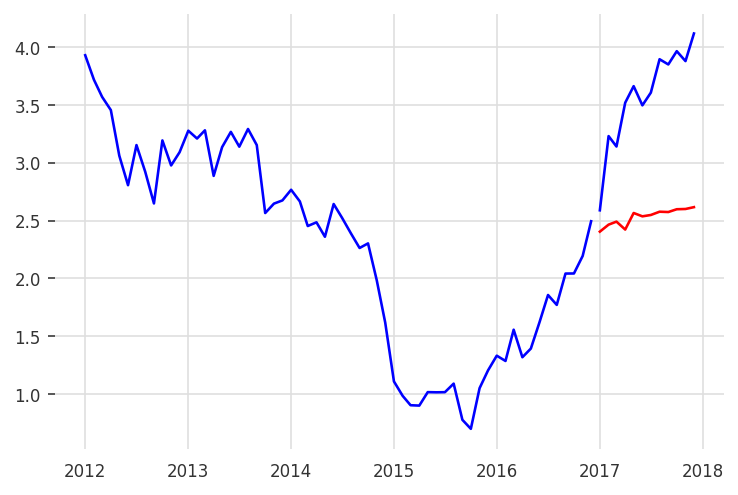

In [137]:
plt.plot(abc, 'r')
plt.plot(dataframes2['df_RPI_YOY17_18'], 'b')
plt.plot(dataframes2['df_RPI_YOY12_17'], 'b')

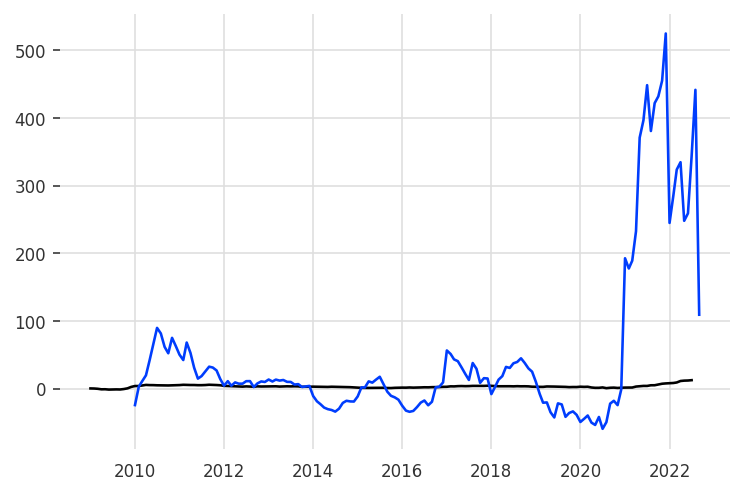

In [47]:
plt.plot(final_df['RPI YOY'])
plt.plot(final_df['ng_YOY'])

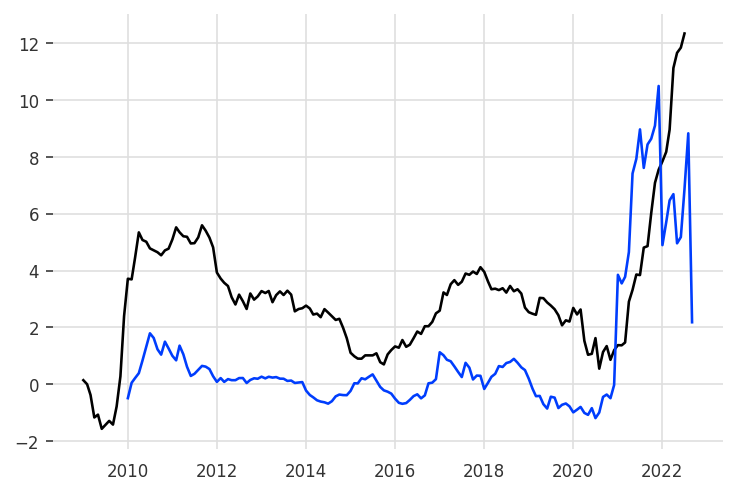

In [48]:
plt.plot(final_df['RPI YOY'])
plt.plot(final_df['ng_YOY']*0.02)

In [49]:
#multiplying natural gas by 0.02 there seems to be much of a correlation therefore, could be a far better indicator 


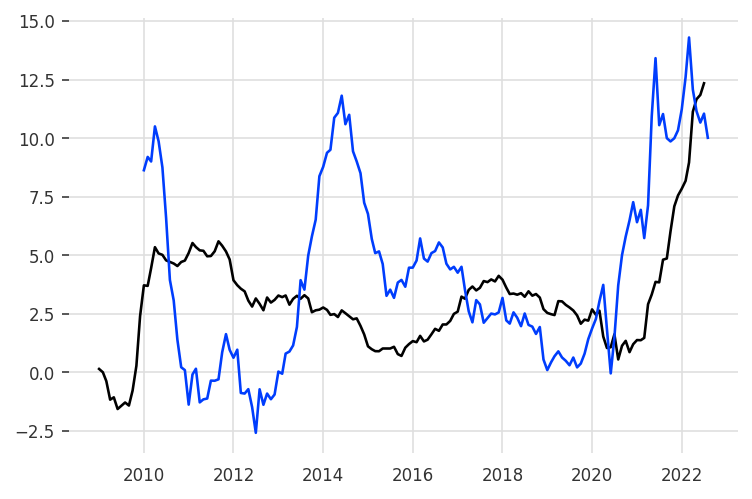

In [50]:
final_df
plt.plot(final_df['RPI YOY'])
plt.plot(final_df['Nationwide_HPI_YOY'])
# this seems very useful for predicting inflation particularly in the last 5 years 

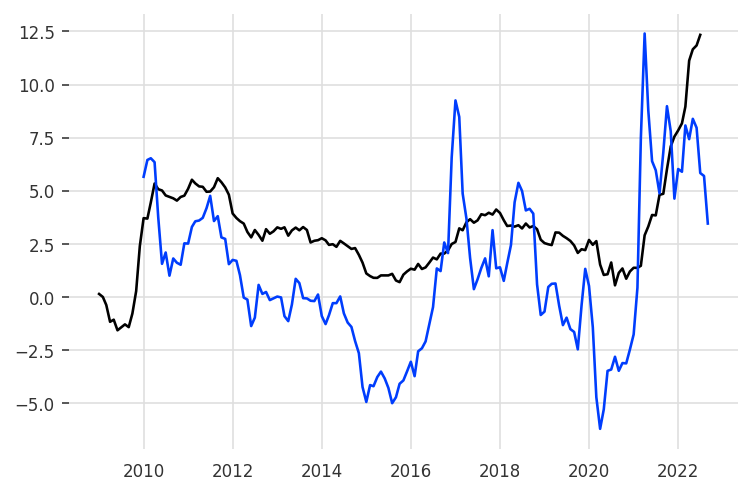

In [51]:
final_df
plt.plot(final_df['RPI YOY'])
plt.plot(final_df['Brent_Crude_YOY']*0.1)
 

In [138]:
final_df

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY
Date,,,,,,,,,,,,,,,,,
2009-01-01,30.903838,33.424333,1.479027,1.099905,4308.390000,596.071497,2135.982324,12.472805,2.122545,3.733286,84.9,210.1,300.2,0.142993,NaN,NaN,NaN
2009-02-01,29.393166,33.617553,1.492643,1.120824,4232.114762,570.410394,2020.716905,9.467866,2.129905,3.758714,85.6,211.4,294.7,0.000000,NaN,NaN,NaN
2009-03-01,31.733352,36.826152,1.494241,1.097877,4107.840909,566.393975,2029.160819,8.064295,2.142045,3.760136,85.8,211.3,301.1,-0.377181,NaN,NaN,NaN
2009-04-01,33.990786,36.012519,1.511936,1.125327,4259.890500,588.042125,2119.383029,7.762397,2.143250,3.819600,86.0,211.5,302.9,-1.168224,NaN,NaN,NaN
2009-05-01,37.524515,38.801542,1.561252,1.131686,4434.719500,582.718727,2164.120107,7.757394,2.031900,3.873900,86.4,212.8,307.2,-1.069270,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,2.538121,2.240542,120.8,337.1,538.4,11.659490,247.890034,83.864024,11.147812
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,2.933563,2.626558,121.8,340.0,541.8,11.842105,258.900656,79.674222,10.661765
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,2.700779,2.302258,122.5,343.2,541.0,12.340426,343.541804,58.346674,11.042693


In [139]:
currency_series = final_df['GBP Curncy']
currency_series

Date
2009-01-01    1.479027
2009-02-01    1.492643
2009-03-01    1.494241
2009-04-01    1.511936
2009-05-01    1.561252
                ...   
2022-05-01    1.247484
2022-06-01    1.233611
2022-07-01    1.231479
2022-08-01    1.211816
2022-09-01    1.272420
Name: GBP Curncy, Length: 165, dtype: float64

In [140]:
pct_change_list = []
for index, val in enumerate(currency_series):
    try:
        old = val
        new = currency_series[index+12]
        pct_change = ((new-old)/old)*100
        pct_change_list.append(pct_change)
        
    except:
        break
pct_change_list

[7.597745446946075,
 3.6215724745178695,
 1.9689593218870916,
 2.07981336395832,
 -4.418225683510267,
 -5.533111568908985,
 -5.2370203930354355,
 -4.072007356531875,
 -2.5926862906713843,
 -2.689170855046105,
 -3.573699488549973,
 -2.069843390059148,
 0.5509728426656862,
 4.595182272614366,
 5.766723424058968,
 5.5439059444431305,
 8.357889851036358,
 6.154958547651603,
 4.9641208304897475,
 5.013428564876272,
 1.5207368592086987,
 1.7014363365825644,
 0.7057298522076599,
 1.1365679146709387,
 -2.0756056891747017,
 -2.200333200538178,
 -1.5330509148025353,
 -1.8420171443878857,
 -2.489293653194903,
 -2.4291149813078348,
 -2.5396440425342117,
 -3.012833212879539,
 1.3941704600855724,
 0.14557376230407612,
 0.6082147817759848,
 2.007912413575552,
 0.5702974461823016,
 -2.295398458395923,
 -3.3092699719180336,
 -3.1511785648901607,
 -2.9336400561421043,
 -0.7644413745658524,
 -1.8400300413067918,
 -1.428201513364213,
 -0.9120258392711748,
 -0.09477135343738037,
 0.4572839204229599,
 0.207

In [141]:
nan_lst = [np.nan,]*12

In [142]:
nan_lst.extend(pct_change_list)

In [143]:
currency_GBP_YOY_list = nan_lst

In [144]:
final_df['GBP_YOY'] = currency_GBP_YOY_list

In [145]:
final_df

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY,GBP_YOY
Date,,,,,,,,,,,,,,,,,,
2009-01-01,30.903838,33.424333,1.479027,1.099905,4308.390000,596.071497,2135.982324,12.472805,2.122545,3.733286,84.9,210.1,300.2,0.142993,NaN,NaN,NaN,NaN
2009-02-01,29.393166,33.617553,1.492643,1.120824,4232.114762,570.410394,2020.716905,9.467866,2.129905,3.758714,85.6,211.4,294.7,0.000000,NaN,NaN,NaN,NaN
2009-03-01,31.733352,36.826152,1.494241,1.097877,4107.840909,566.393975,2029.160819,8.064295,2.142045,3.760136,85.8,211.3,301.1,-0.377181,NaN,NaN,NaN,NaN
2009-04-01,33.990786,36.012519,1.511936,1.125327,4259.890500,588.042125,2119.383029,7.762397,2.143250,3.819600,86.0,211.5,302.9,-1.168224,NaN,NaN,NaN,NaN
2009-05-01,37.524515,38.801542,1.561252,1.131686,4434.719500,582.718727,2164.120107,7.757394,2.031900,3.873900,86.4,212.8,307.2,-1.069270,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,2.538121,2.240542,120.8,337.1,538.4,11.659490,247.890034,83.864024,11.147812,-10.857228
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,2.933563,2.626558,121.8,340.0,541.8,11.842105,258.900656,79.674222,10.661765,-10.911963
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,2.700779,2.302258,122.5,343.2,541.0,12.340426,343.541804,58.346674,11.042693,-10.640541


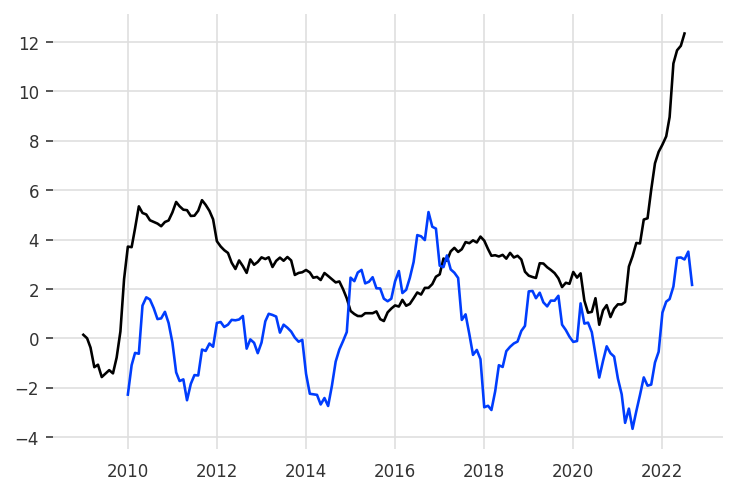

In [146]:
plt.plot(final_df['RPI YOY'])
plt.plot(final_df['GBP_YOY']*-.3)

In [147]:
#create a model to predict inflation in 2020 using price of brent crude, currency, House price index 
GBP_YOY_df = final_df[['GBP_YOY']]
GBP_YOY_df_2010 = GBP_YOY_df.iloc[12:]

In [148]:
dataframes5 = {}
est_frames5 = {}

for i in range(8):
    year = 9 + i
    dataframes5[f'df_GBP_YOY{year+1}_{year+6}'] = GBP_YOY_df_2010[(year-9)*12:(year-9)*12+60]
    dataframes5[f'df_GBP_YOY{year+6}_{year+7}'] = GBP_YOY_df_2010[(year-9)*12+60:(year-9)*12+72]
#     placeholder for est_frames here ... will be overwritten once we have estimates
    est_frames5[f'df_GBP_YOY{year+6}_{year+7}'] = dataframes5[f'df_GBP_YOY{year+6}_{year+7}']
dataframes5

{'df_GBP_YOY10_15':              GBP_YOY
 Date                
 2010-01-01  7.597745
 2010-02-01  3.621572
 2010-03-01  1.968959
 2010-04-01  2.079813
 2010-05-01 -4.418226
 2010-06-01 -5.533112
 2010-07-01 -5.237020
 2010-08-01 -4.072007
 2010-09-01 -2.592686
 2010-10-01 -2.689171
 2010-11-01 -3.573699
 2010-12-01 -2.069843
 2011-01-01  0.550973
 2011-02-01  4.595182
 2011-03-01  5.766723
 2011-04-01  5.543906
 2011-05-01  8.357890
 2011-06-01  6.154959
 2011-07-01  4.964121
 2011-08-01  5.013429
 2011-09-01  1.520737
 2011-10-01  1.701436
 2011-11-01  0.705730
 2011-12-01  1.136568
 2012-01-01 -2.075606
 2012-02-01 -2.200333
 2012-03-01 -1.533051
 2012-04-01 -1.842017
 2012-05-01 -2.489294
 2012-06-01 -2.429115
 2012-07-01 -2.539644
 2012-08-01 -3.012833
 2012-09-01  1.394170
 2012-10-01  0.145574
 2012-11-01  0.608215
 2012-12-01  2.007912
 2013-01-01  0.570297
 2013-02-01 -2.295398
 2013-03-01 -3.309270
 2013-04-01 -3.151179
 2013-05-01 -2.933640
 2013-06-01 -0.764441
 2013-07-01 -

In [149]:
#psudeocode
#1. create a df for b crude
#2.run through the for loop to create different series
#3. create two new arrays
#4. run through the procedure as you have done before. 


In [150]:
B_crude_YOY_df = final_df[['Brent_Crude_YOY']]
B_crude_YOY_df_2010 = B_crude_YOY_df.iloc[12:]

In [151]:
dataframes6 = {}
est_frames6 = {}

for i in range(8):
    year = 9 + i
    dataframes6[f'df_B_crude_YOY{year+1}_{year+6}'] = B_crude_YOY_df_2010[(year-9)*12:(year-9)*12+60]
    dataframes6[f'df_B_crude_YOY{year+6}_{year+7}'] = B_crude_YOY_df_2010[(year-9)*12+60:(year-9)*12+72]
#     placeholder for est_frames here ... will be overwritten once we have estimates
    est_frames6[f'df_B_crude_YOY{year+6}_{year+7}'] = dataframes6[f'df_B_crude_YOY{year+6}_{year+7}']
dataframes6

{'df_B_crude_YOY10_15':             Brent_Crude_YOY
 Date                       
 2010-01-01        56.592974
 2010-02-01        64.509534
 2010-03-01        65.315031
 2010-04-01        63.462765
 2010-05-01        37.503581
 2010-06-01        15.618681
 2010-07-01        20.942718
 2010-08-01        10.034994
 2010-09-01        18.133912
 2010-10-01        16.110481
 2010-11-01        15.170731
 2010-12-01        25.257028
 2011-01-01        25.142686
 2011-02-01        32.987779
 2011-03-01        35.640833
 2011-04-01        35.999700
 2011-05-01        37.262024
 2011-06-01        41.818165
 2011-07-01        47.609326
 2011-08-01        35.742883
 2011-09-01        38.054623
 2011-10-01        28.048329
 2011-11-01        27.341732
 2011-12-01        15.454473
 2012-01-01        17.447200
 2012-02-01        17.020394
 2012-03-01        10.300589
 2012-04-01        -0.278632
 2012-05-01        -1.237866
 2012-06-01       -13.684139
 2012-07-01        -9.724939
 2012-08-01         

In [152]:
#using just the first 3 exog variables was not particularly successful therefore now you are using brent crude 

In [153]:
arr1 = np.array(dataframes3['df_ng_YOY16_21'])
arr2 = np.array(dataframes4['df_HPI_YOY16_21'])
arr3 = np.array(dataframes5['df_GBP_YOY16_21'])
arr4 = np.array(dataframes6['df_B_crude_YOY16_21'])

In [154]:
arrall = np.array([arr1,arr2,arr3,arr4])

In [155]:
arrallshape = arrall.reshape(60,4)

In [156]:
arrallshape.shape

(60, 4)

In [157]:
exog = arrallshape

In [158]:
arr5 = np.array(dataframes3['df_ng_YOY21_22'])
arr6 = np.array(dataframes4['df_HPI_YOY21_22'])
arr7 = np.array(dataframes5['df_GBP_YOY21_22'])
arr8 = np.array(dataframes6['df_B_crude_YOY21_22'])

In [159]:
arratst = np.array([arr5,arr6,arr7,arr8]).reshape(12,4)
arratst

array([[192.49580144, 177.40135827, 188.92705512, 232.51645609],
       [370.7443026 , 396.45100665, 448.31445424, 380.57153984],
       [421.80143171, 431.7690558 , 454.97221912, 524.69053076],
       [  6.40817274,   6.93574577,   5.73059361,   7.12840117],
       [ 10.92283032,  13.41209173,  10.55139551,  11.02661597],
       [  9.9977832 ,   9.8569857 ,   9.99345407,  10.33210332],
       [  5.44523964,   7.55711018,  11.40858748,   9.4885444 ],
       [ 12.21595465,   9.82619008,   7.65146584,   5.27391805],
       [  6.39248731,   6.24709201,   3.26524237,   1.81357982],
       [-17.60259834,   4.37657849,  74.84629562, 124.04745533],
       [ 87.81015354,  63.9339062 ,  59.67063833,  48.78078108],
       [ 68.07112431,  89.82258145,  78.01975085,  46.30447977]])

In [160]:
#auto arimax does not exist therefore create your own grid search using three different for loops for p,d,q

In [174]:
preds = {}
for p in range(5):
    for d in range(5):
        for q in range(5):
            model=sm.tsa.arima.ARIMA(dataframes2['df_RPI_YOY16_21'],exog=exog,order=(p, d, q))
            model=model.fit()
            ypred = model.predict(start=60,end=71,dynamic=True, exog=arratst)
            preds[p,d,q]=ypred


/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequen

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_re

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

{(0,
  0,
  0): 2021-01-01    2.078585
 2021-02-01    3.275754
 2021-03-01    2.068139
 2021-04-01    2.551466
 2021-05-01    2.566403
 2021-06-01    2.555988
 2021-07-01    2.610894
 2021-08-01    2.541299
 2021-09-01    2.556131
 2021-10-01    2.765290
 2021-11-01    2.343246
 2021-12-01    2.890273
 Freq: MS, Name: predicted_mean, dtype: float64,
 (0,
  0,
  1): 2021-01-01    1.943604
 2021-02-01    4.423027
 2021-03-01    3.789887
 2021-04-01    2.587180
 2021-05-01    2.681397
 2021-06-01    2.572704
 2021-07-01    2.589866
 2021-08-01    2.556863
 2021-09-01    2.601936
 2021-10-01    2.079843
 2021-11-01    2.303800
 2021-12-01    3.691891
 Freq: MS, Name: predicted_mean, dtype: float64,
 (0,
  0,
  2): 2021-01-01    2.593592
 2021-02-01    4.727998
 2021-03-01    3.734223
 2021-04-01    2.782799
 2021-05-01    2.837635
 2021-06-01    2.784378
 2021-07-01    2.823575
 2021-08-01    2.762773
 2021-09-01    2.785237
 2021-10-01    2.843201
 2021-11-01    2.605587
 2021-12-01    3.

In [175]:
preds.keys()
# the acutal values are dataframes2['df_RPI_YOY21_22']
for key in preds.keys():
    print(key)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(0, 2, 4)
(0, 3, 0)
(0, 3, 1)
(0, 3, 2)
(0, 3, 3)
(0, 3, 4)
(0, 4, 0)
(0, 4, 1)
(0, 4, 2)
(0, 4, 3)
(0, 4, 4)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 0, 4)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
(1, 2, 4)
(1, 3, 0)
(1, 3, 1)
(1, 3, 2)
(1, 3, 3)
(1, 3, 4)
(1, 4, 0)
(1, 4, 1)
(1, 4, 2)
(1, 4, 3)
(1, 4, 4)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 0, 3)
(2, 0, 4)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(2, 2, 0)
(2, 2, 1)
(2, 2, 2)
(2, 2, 3)
(2, 2, 4)
(2, 3, 0)
(2, 3, 1)
(2, 3, 2)
(2, 3, 3)
(2, 3, 4)
(2, 4, 0)
(2, 4, 1)
(2, 4, 2)
(2, 4, 3)
(2, 4, 4)
(3, 0, 0)
(3, 0, 1)
(3, 0, 2)
(3, 0, 3)
(3, 0, 4)
(3, 1, 0)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(3, 2, 0)
(3, 2, 1)
(3, 2, 2)
(3, 2, 3)
(3, 2, 4)
(3, 3, 0)
(3, 3, 1)
(3, 3, 2)
(3, 3, 3)
(3, 3, 4)
(3, 4, 0)
(3, 4, 1)
(3, 4, 2)
(3, 4, 3)
(3, 4, 4)


In [176]:
dataframes2['df_RPI_YOY21_22']['RPI YOY']

    

Date
2021-01-01    1.376462
2021-02-01    1.369863
2021-03-01    1.469583
2021-04-01    2.904990
2021-05-01    3.319644
2021-06-01    3.860608
2021-07-01    3.840925
2021-08-01    4.807364
2021-09-01    4.858987
2021-10-01    6.014271
2021-11-01    7.086882
2021-12-01    7.549086
Name: RPI YOY, dtype: float64

In [180]:
 preds[(0, 0, 0)]

2021-01-01    2.078585
2021-02-01    3.275754
2021-03-01    2.068139
2021-04-01    2.551466
2021-05-01    2.566403
2021-06-01    2.555988
2021-07-01    2.610894
2021-08-01    2.541299
2021-09-01    2.556131
2021-10-01    2.765290
2021-11-01    2.343246
2021-12-01    2.890273
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
mape - mean absolute percentsge error

In [215]:
(preds[(0, 0, 0)] - dataframes2['df_RPI_YOY21_22']['RPI YOY']) * 100 

2021-01-01     70.212280
2021-02-01    190.589137
2021-03-01     59.855593
2021-04-01    -35.352357
2021-05-01    -75.324128
2021-06-01   -130.461976
2021-07-01   -123.003080
2021-08-01   -226.606587
2021-09-01   -230.285595
2021-10-01   -324.898117
2021-11-01   -474.363596
2021-12-01   -465.881289
Freq: MS, dtype: float64

In [ ]:
(1/n) * Σ(|actual – prediction| / |actual|) * 100

In [236]:
error = sum(abs(dataframes2['df_RPI_YOY21_22']['RPI YOY']-preds[(4,4,4)])/abs(dataframes2['df_RPI_YOY21_22']['RPI YOY']))

In [237]:
error/12*100

15.318605660242026

In [247]:
dataframes2['df_RPI_YOY21_22']['RPI YOY']

Date
2021-01-01    1.376462
2021-02-01    1.369863
2021-03-01    1.469583
2021-04-01    2.904990
2021-05-01    3.319644
2021-06-01    3.860608
2021-07-01    3.840925
2021-08-01    4.807364
2021-09-01    4.858987
2021-10-01    6.014271
2021-11-01    7.086882
2021-12-01    7.549086
Name: RPI YOY, dtype: float64

In [244]:
for y in preds.keys():
    print(y)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(0, 2, 4)
(0, 3, 0)
(0, 3, 1)
(0, 3, 2)
(0, 3, 3)
(0, 3, 4)
(0, 4, 0)
(0, 4, 1)
(0, 4, 2)
(0, 4, 3)
(0, 4, 4)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 0, 4)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
(1, 2, 4)
(1, 3, 0)
(1, 3, 1)
(1, 3, 2)
(1, 3, 3)
(1, 3, 4)
(1, 4, 0)
(1, 4, 1)
(1, 4, 2)
(1, 4, 3)
(1, 4, 4)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 0, 3)
(2, 0, 4)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(2, 2, 0)
(2, 2, 1)
(2, 2, 2)
(2, 2, 3)
(2, 2, 4)
(2, 3, 0)
(2, 3, 1)
(2, 3, 2)
(2, 3, 3)
(2, 3, 4)
(2, 4, 0)
(2, 4, 1)
(2, 4, 2)
(2, 4, 3)
(2, 4, 4)
(3, 0, 0)
(3, 0, 1)
(3, 0, 2)
(3, 0, 3)
(3, 0, 4)
(3, 1, 0)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(3, 2, 0)
(3, 2, 1)
(3, 2, 2)
(3, 2, 3)
(3, 2, 4)
(3, 3, 0)
(3, 3, 1)
(3, 3, 2)
(3, 3, 3)
(3, 3, 4)
(3, 4, 0)
(3, 4, 1)
(3, 4, 2)
(3, 4, 3)
(3, 4, 4)


In [251]:
mape_lst= []
for y in preds.keys():
    percent_list = []
    for x in range(12):
        error = abs(dataframes2['df_RPI_YOY21_22']['RPI YOY'][x]-preds[y][x])/(dataframes2['df_RPI_YOY21_22']['RPI YOY'][x])
        percent_list.append(error)
    mape = sum(percent_list)/12*100
    mape_lst.append(mape)
mape_lst


[50.72897552589808,
 66.27839005379622,
 67.94023371381067,
 50.05697154040655,
 41.27344245987621,
 62.67743582055336,
 63.31466350813763,
 73.23869768337278,
 67.58289573533354,
 74.2053362796034,
 24.06005114487394,
 70.3365055163056,
 77.68889834673965,
 84.40808131504069,
 69.99225917379984,
 926.0970133051652,
 30.62738071936451,
 54.687583661283256,
 69.23076036104341,
 77.80543645980038,
 6854.140658350643,
 964.1998571566792,
 57.361191548123834,
 193.76236287683798,
 54.909096602589166,
 56.60353069880094,
 57.22723826169144,
 63.60221682534694,
 53.72223372117529,
 71.32111606367828,
 63.81596120042261,
 63.32369197584511,
 72.98138254672416,
 67.76931144377313,
 67.61762593698616,
 75.33366801531733,
 79.78839352262405,
 79.63013905162283,
 74.79469664148493,
 83.65892160846528,
 176.1958971881268,
 66.6400493152713,
 86.54374669289163,
 88.97750898245134,
 85.67536007267628,
 2553.6770315640756,
 204.96531516906552,
 91.40895518854349,
 73.31414108022342,
 54.7156017360046

In [260]:
mape_lst.index(min(mape_lst))


90

In [264]:
list(preds.keys())[90]

(3, 3, 0)

In [270]:
min(mape_lst)

9.276431081132557

In [265]:
model=sm.tsa.arima.ARIMA(dataframes2['df_RPI_YOY16_21'],exog=exog,order=(3, 3, 0))
results=model.fit()

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

In [266]:
abc = results.predict(start=60,end=71,dynamic=True, exog=arratst)

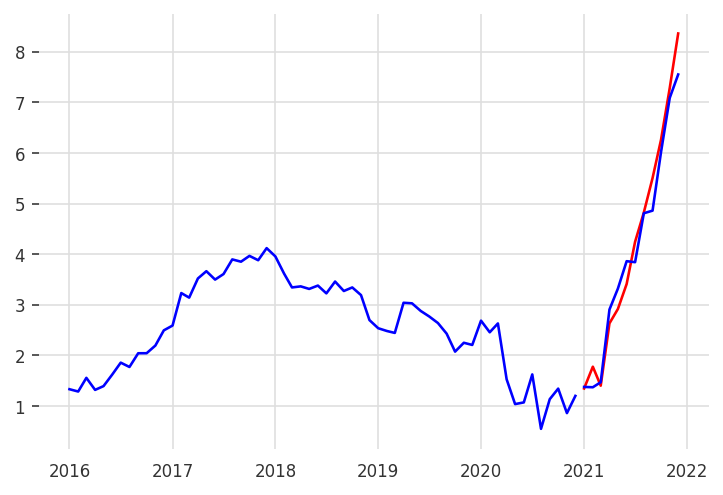

In [267]:
plt.plot(abc, 'r')
plt.plot(dataframes2['df_RPI_YOY21_22'], 'b')
plt.plot(dataframes2['df_RPI_YOY16_21'], 'b')


In [ ]:
#The problem with previous model is that it requires future knowlegde of exogenous variables 

In [268]:
#in order to combat this I am going to to do monthly predictions becuase values of x variables already known pre RPI

In [271]:
final_df

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY,GBP_YOY
Date,,,,,,,,,,,,,,,,,,
2009-01-01,30.903838,33.424333,1.479027,1.099905,4308.390000,596.071497,2135.982324,12.472805,2.122545,3.733286,84.9,210.1,300.2,0.142993,NaN,NaN,NaN,NaN
2009-02-01,29.393166,33.617553,1.492643,1.120824,4232.114762,570.410394,2020.716905,9.467866,2.129905,3.758714,85.6,211.4,294.7,0.000000,NaN,NaN,NaN,NaN
2009-03-01,31.733352,36.826152,1.494241,1.097877,4107.840909,566.393975,2029.160819,8.064295,2.142045,3.760136,85.8,211.3,301.1,-0.377181,NaN,NaN,NaN,NaN
2009-04-01,33.990786,36.012519,1.511936,1.125327,4259.890500,588.042125,2119.383029,7.762397,2.143250,3.819600,86.0,211.5,302.9,-1.168224,NaN,NaN,NaN,NaN
2009-05-01,37.524515,38.801542,1.561252,1.131686,4434.719500,582.718727,2164.120107,7.757394,2.031900,3.873900,86.4,212.8,307.2,-1.069270,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,2.538121,2.240542,120.8,337.1,538.4,11.659490,247.890034,83.864024,11.147812,-10.857228
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,2.933563,2.626558,121.8,340.0,541.8,11.842105,258.900656,79.674222,10.661765,-10.911963
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,2.700779,2.302258,122.5,343.2,541.0,12.340426,343.541804,58.346674,11.042693,-10.640541


In [ ]:
#psuedocode.
#predict monthly for the period previously covered. 
#predict for the first month of 2021.
#remember you need to change the dimension of the exogenous variables in the predict 

In [289]:
arrr5 = np.array(dataframes3['df_ng_YOY21_22'])[0][0]
arrr6 = np.array(dataframes4['df_HPI_YOY21_22'])[0][0]
arrr7 = np.array(dataframes5['df_GBP_YOY21_22'])[0][0]
arrr8 = np.array(dataframes6['df_B_crude_YOY21_22'])[0][0]

In [299]:
arratm = np.array([arrr5,arrr6,arrr7,arrr8])
arratm.reshape(1,4)

array([[192.49580144,   6.40817274,   5.44523964, -17.60259834]])

In [313]:
model=sm.tsa.arima.ARIMA(dataframes2['df_RPI_YOY16_21'],exog=exog, order=(3, 3, 0))
results=model.fit()
abc = results.predict(start=60,end=60,exog = arratm,dynamic=True)

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

In [314]:
abc


2021-01-01    1.410204
Freq: MS, dtype: float64

In [309]:
dataframes2['df_RPI_YOY21_22']

,RPI YOY
Date,
2021-01-01,1.376462
2021-02-01,1.369863
2021-03-01,1.469583
2021-04-01,2.904990
2021-05-01,3.319644
2021-06-01,3.860608
2021-07-01,3.840925
2021-08-01,4.807364
2021-09-01,4.858987


In [316]:
# for jan 2021 the real RPI was 294.6
#for jan 2020 the rpi was 290.6 means that the pred was 294.69(290.6* 1.01410204)
#for this whole time period the p,d,q I am going to use are (3,3,0) because this was found optimal by the above gridsearch


In [374]:
#The new data to feed into the model is in the dataframe 
final_df[['RPI YOY']].iloc[85:145]


,RPI YOY
Date,
2016-02-01,1.285547
2016-03-01,1.555815
2016-04-01,1.317829
2016-05-01,1.392650
2016-06-01,1.622248
2016-07-01,1.856148
2016-08-01,1.770593
2016-09-01,2.041602
2016-10-01,2.042389


In [387]:
final_df.tail(32)

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY,GBP_YOY
Date,,,,,,,,,,,,,,,,,,
2020-02-01,42.943990,35.965277,1.291857,1.164014,6796.644286,2501.024605,3019.880708,7.418630,0.506938,0.649310,108.6,292.0,431.1,2.456140,-44.669642,-14.213663,2.277580,0.369212
2020-03-01,27.211757,25.801736,1.239504,1.111822,5813.382174,2243.053117,2631.283557,6.975790,0.430326,0.619239,108.6,292.6,438.0,2.630656,-39.853128,-47.186673,3.034580,-4.718778
2020-04-01,21.072957,17.991584,1.263773,1.139632,6002.315714,2370.656764,2666.200693,5.995653,0.391391,0.527205,108.5,292.6,444.7,1.526718,-50.429637,-62.068964,3.732214,-1.980278
2020-05-01,25.990237,28.047836,1.247080,1.123495,6134.460000,2450.288506,2722.792714,4.950512,0.293880,0.456275,108.5,292.2,436.7,1.037344,-53.817576,-52.898586,1.842351,-2.119432
2020-06-01,32.338286,31.462164,1.260819,1.118319,6267.593333,2475.319143,2906.093329,5.429804,0.277643,0.456286,108.6,292.7,431.7,1.070442,-42.019421,-34.780933,-0.046307,-0.827158
2020-07-01,33.762927,31.986664,1.280167,1.112688,6244.110000,2520.160305,2990.676103,5.291466,0.194758,0.406646,109.1,294.2,440.7,1.623489,-59.565361,-34.137639,1.497006,2.196094
2020-08-01,34.536521,31.706150,1.303548,1.117148,6163.494211,2569.477068,2952.475053,6.921193,0.179333,0.458500,108.6,293.3,447.1,0.548509,-49.734706,-28.143014,3.711436,5.294638
2020-09-01,32.488230,30.814480,1.288886,1.106245,6078.599545,2558.413712,2949.601847,8.556717,0.145932,0.431682,109.1,294.3,451.1,1.134021,-22.294306,-34.765503,5.004655,3.054023
2020-10-01,32.041533,31.666313,1.295946,1.114825,6064.609130,2604.212440,2912.902883,9.773120,0.166858,0.458687,109.1,294.3,454.5,1.342975,-18.106757,-31.109528,5.796089,1.078859


In [375]:
arr1 = np.array(final_df[['ng_YOY']].iloc[85:145])
arr2 = np.array(final_df[['Nationwide_HPI_YOY']].iloc[85:145])
arr3 = np.array(final_df[['GBP_YOY']].iloc[85:145])
arr4 = np.array(final_df[['Brent_Crude_YOY']].iloc[85:145])

In [376]:
arrall = np.array([arr1,arr2,arr3,arr4])
arrall.shape

(4, 60, 1)

In [377]:
arrallshape = arrall.reshape(60,4)

In [378]:
exog = arrallshape

In [379]:
arr5 = np.array(dataframes3['df_ng_YOY21_22'])[1][0]
arr6 = np.array(dataframes4['df_HPI_YOY21_22'])[1][0]
arr7 = np.array(dataframes5['df_GBP_YOY21_22'])[1][0]
arr8 = np.array(dataframes6['df_B_crude_YOY21_22'])[1][0]

In [380]:
arratst = np.array([arr5,arr6,arr7,arr8]).reshape(1,4)
arratst

array([[177.40135827,   6.93574577,   7.55711018,   4.37657849]])

In [397]:
model=sm.tsa.arima.ARIMA(final_df[['RPI YOY']].iloc[85:145],exog=exog, order=(3, 3, 0))
results=model.fit()
abc = results.predict(start=60,end=60,exog = arratst,dynamic=True)

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

In [398]:
abc[0]

1.8412640915006069

In [399]:
prediction2021_feb = 292 * 1.01841264
prediction2021_feb

297.37649088

In [400]:
# actual number is  296.0
percent = ((297.37649088- 296)/297.37649088)*100
percent

0.4628781770632499

In [414]:
#prediction for March

In [401]:
arr1 = np.array(final_df[['ng_YOY']].iloc[86:146])
arr2 = np.array(final_df[['Nationwide_HPI_YOY']].iloc[86:146])
arr3 = np.array(final_df[['GBP_YOY']].iloc[86:146])
arr4 = np.array(final_df[['Brent_Crude_YOY']].iloc[86:146])
arrall = np.array([arr1,arr2,arr3,arr4])
arrallshape = arrall.reshape(60,4)

In [402]:
arr5 = np.array(dataframes3['df_ng_YOY21_22'])[2][0]
arr6 = np.array(dataframes4['df_HPI_YOY21_22'])[2][0]
arr7 = np.array(dataframes5['df_GBP_YOY21_22'])[2][0]
arr8 = np.array(dataframes6['df_B_crude_YOY21_22'])[2][0]
arratst = np.array([arr5,arr6,arr7,arr8]).reshape(1,4)
arratst

array([[188.92705512,   5.73059361,  11.40858748,  74.84629562]])

In [410]:
model=sm.tsa.arima.ARIMA(final_df[['RPI YOY']].iloc[86:146],exog=exog, order=(3, 3, 0))
results=model.fit()
abc = results.predict(start=60,end=60,exog = arratst,dynamic=True)

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

In [411]:
abc

2021-03-01    2.623879
Freq: MS, dtype: float64

In [412]:
292.6*1.02700442

300.501493292

In [413]:
296.9

296.9

In [ ]:
#prediction for April

In [ ]:
arr1 = np.array(final_df[['ng_YOY']].iloc[87:147])
arr2 = np.array(final_df[['Nationwide_HPI_YOY']].iloc[87:147])
arr3 = np.array(final_df[['GBP_YOY']].iloc[87:147])
arr4 = np.array(final_df[['Brent_Crude_YOY']].iloc[87:147])
arrall = np.array([arr1,arr2,arr3,arr4])
arrallshape = arrall.reshape(60,4)

In [418]:
arr5 = np.array(dataframes3['df_ng_YOY21_22'])[4][0]
arr6 = np.array(dataframes4['df_HPI_YOY21_22'])[4][0]
arr7 = np.array(dataframes5['df_GBP_YOY21_22'])[4][0]
arr8 = np.array(dataframes6['df_B_crude_YOY21_22'])[4][0]
arratst = np.array([arr5,arr6,arr7,arr8]).reshape(1,4)
arratst

array([[370.7443026 ,  10.92283032,  12.21595465,  87.81015354]])

In [441]:
model=sm.tsa.arima.ARIMA(final_df[['RPI YOY']].iloc[87:147],exog=exog, order=(4, 4, 4))
results=model.fit()
abc = results.predict(start=60,end=60,exog = arratst,dynamic=True)

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertibl

In [428]:
abc

2021-04-01    0.676391
Freq: MS, dtype: float64

In [425]:
292.6*1.00771454

294.857274404

In [ ]:
#actual number is 301.1

In [422]:
#Prediction for September 2022 

In [477]:
final_df[['RPI YOY']].iloc[101:162]


,RPI YOY
Date,
2017-06-01,3.496769
2017-07-01,3.606682
2017-08-01,3.895613
2017-09-01,3.850510
2017-10-01,3.965257
...,...
2022-02-01,8.175676
2022-03-01,8.959246
2022-04-01,11.125872


In [435]:
# the procedure is to try and predict july then use the optimal parameters to predict septembers 
#step 1 set up the exogenous parameters. 
#step 2 is to perform the grid search 
# step 3 implement the model 

In [585]:
arr1 = np.array(final_df[['ng_YOY']].iloc[101:162])
arr2 = np.array(final_df[['Nationwide_HPI_YOY']].iloc[101:162])
arr3 = np.array(final_df[['GBP_YOY']].iloc[101:162])
arr4 = np.array(final_df[['Brent_Crude_YOY']].iloc[101:162])
arrall = np.array([arr1,arr2,arr3,arr4])
arrallshape = arrall.reshape(61,4)
exog=arrallshape

In [586]:
arr5 = np.array(dataframes3['df_ng_YOY22_23'])[6][0]
arr6 = np.array(dataframes4['df_HPI_YOY22_23'])[6][0]
arr7 = np.array(dataframes5['df_GBP_YOY22_23'])[6][0]
arr8 = np.array(dataframes6['df_B_crude_YOY22_23'])[6][0]
arratst = np.array([arr5,arr6,arr7,arr8]).reshape(1,4)
arratst

array([[343.54180382,  11.04269294, -10.64054131,  58.34667398]])

In [485]:
preds = {}
for p in range(5):
    for d in range(5):
        for q in range(5):
            model=sm.tsa.arima.ARIMA(final_df[['RPI YOY']].iloc[101:162],exog=exog,order=(p, d, q))
            model=model.fit()
            ypred = model.predict(start=61,end=61,dynamic=True, exog=arratst)
            preds[p,d,q]=ypred
preds

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequen

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertibl

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertibl

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequen

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

{(0,
  0,
  0): 2022-07-01    4.058805
 Freq: MS, dtype: float64,
 (0,
  0,
  1): 2022-07-01    7.498032
 Freq: MS, dtype: float64,
 (0,
  0,
  2): 2022-07-01    10.967794
 Freq: MS, dtype: float64,
 (0,
  0,
  3): 2022-07-01    10.064172
 Freq: MS, dtype: float64,
 (0,
  0,
  4): 2022-07-01    10.965827
 Freq: MS, dtype: float64,
 (0,
  1,
  0): 2022-07-01    11.833788
 Freq: MS, dtype: float64,
 (0,
  1,
  1): 2022-07-01    11.793921
 Freq: MS, dtype: float64,
 (0,
  1,
  2): 2022-07-01    11.765379
 Freq: MS, dtype: float64,
 (0,
  1,
  3): 2022-07-01    11.933119
 Freq: MS, dtype: float64,
 (0,
  1,
  4): 2022-07-01    12.128729
 Freq: MS, dtype: float64,
 (0,
  2,
  0): 2022-07-01    11.91769
 Freq: MS, dtype: float64,
 (0,
  2,
  1): 2022-07-01    12.429516
 Freq: MS, dtype: float64,
 (0,
  2,
  2): 2022-07-01    12.528488
 Freq: MS, dtype: float64,
 (0,
  2,
  3): 2022-07-01    12.582652
 Freq: MS, dtype: float64,
 (0,
  2,
  4): 2022-07-01    12.421685
 Freq: MS, dtype: float64

(4, 4, 4)

In [487]:
final_df['RPI YOY'].iloc[162:163]

Date
2022-07-01    12.340426
Name: RPI YOY, dtype: float64

In [498]:
mape_lst= []
for y in preds.keys():
    error = abs(final_df['RPI YOY'].iloc[162:163]-preds[y])/(final_df['RPI YOY'].iloc[162:163])
    mape_lst.append(error)
mape_lst


[Date
 2022-07-01    0.671097
 dtype: float64,
 Date
 2022-07-01    0.392401
 dtype: float64,
 Date
 2022-07-01    0.11123
 dtype: float64,
 Date
 2022-07-01    0.184455
 dtype: float64,
 Date
 2022-07-01    0.11139
 dtype: float64,
 Date
 2022-07-01    0.041055
 dtype: float64,
 Date
 2022-07-01    0.044286
 dtype: float64,
 Date
 2022-07-01    0.046599
 dtype: float64,
 Date
 2022-07-01    0.033006
 dtype: float64,
 Date
 2022-07-01    0.017155
 dtype: float64,
 Date
 2022-07-01    0.034256
 dtype: float64,
 Date
 2022-07-01    0.007219
 dtype: float64,
 Date
 2022-07-01    0.01524
 dtype: float64,
 Date
 2022-07-01    0.019629
 dtype: float64,
 Date
 2022-07-01    0.006585
 dtype: float64,
 Date
 2022-07-01    0.069828
 dtype: float64,
 Date
 2022-07-01    0.034329
 dtype: float64,
 Date
 2022-07-01    0.02684
 dtype: float64,
 Date
 2022-07-01    0.029465
 dtype: float64,
 Date
 2022-07-01    0.009149
 dtype: float64,
 Date
 2022-07-01    0.027919
 dtype: float64,
 Date
 2022-07-01

In [461]:
#get the index of min mape then turn preds.keys into a list in order to index it.

In [520]:
current_lowest_pos = -1
current_lowest = 1
for pos, item in enumerate(mape_lst):
    if item[0] < current_lowest:
        print(current_lowest)
        print(pos)
        current_lowest = item[0]
        current_lowest_pos = pos
pos

1
0
0.6710968524088288
1
0.3924008486787774
2
0.11123046478638238
5
0.04105509441689523
8
0.03300585850266386
9
0.017154691092593453
11
0.007219388691956556
14
0.006584800183948537
31
0.0018012676025973662
38


124

In [523]:
current_lowest_pos = -1
current_lowest = 1
for pos, item in enumerate(mape_lst):
    if item[0] < current_lowest:
        current_lowest = item[0]
        current_lowest_pos = pos
current_lowest_pos

38

In [524]:
mape_lst[38][0]

0.0005534651489651307

In [525]:
list(preds.keys())[38]

(1, 2, 3)

In [516]:
preds.keys()

dict_keys([(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 4, 0), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 3, 0), (2, 3, 1), (2, 3, 2), (2, 3, 3), (2, 3, 4), (2, 4, 0), (2, 4, 1), (2, 4, 2), (2, 4, 3), (2, 4, 4), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4),

In [587]:
model=sm.tsa.arima.ARIMA(final_df[['RPI YOY']].iloc[101:162],exog=exog, order=(3, 3, 0))
results=model.fit()
abc = results.predict(start=61,end=61,exog = arratst,dynamic=True)

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [588]:
abc

2022-07-01    12.63492
Freq: MS, dtype: float64

In [589]:
305.5*1.1263492

344.0996806

In [549]:
final_df.tail(18)

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY,GBP_YOY
Date,,,,,,,,,,,,,,,,,,
2021-04-01,47.213424,46.172116,1.383686,1.153600,6927.348182,3005.070776,3441.960740,19.936533,0.329223,0.930791,110.1,301.1,476.4,2.904990,232.516456,124.047455,7.128401,9.488544
2021-05-01,48.812304,46.729268,1.399423,1.160173,6982.523000,2971.502763,3437.496768,23.304252,0.340790,1.011014,110.8,301.9,484.4,3.319644,370.744303,87.810154,10.922830,12.215955
2021-06-01,53.013416,50.825822,1.384710,1.163757,7082.197143,3069.701571,3506.283425,26.956315,0.406043,0.966976,111.3,304.0,489.6,3.860608,396.451007,63.933906,13.412092,9.826190
2021-07-01,53.909481,50.764547,1.378118,1.164877,7035.095455,3149.767799,3481.896649,29.013873,0.441232,0.839173,111.3,305.5,487.2,3.840925,448.314454,59.670638,10.551396,7.651466
2021-08-01,51.383706,49.108127,1.372296,1.164091,7075.450455,3188.928422,3524.197265,33.261286,0.481404,0.880983,112.1,307.4,496.4,4.807364,380.571540,48.780781,11.026616,5.273918
2021-09-01,54.603333,51.839287,1.371278,1.165922,7027.244348,3188.294007,3517.402167,44.649074,0.566613,0.958187,112.4,308.6,496.2,4.858987,421.801432,68.071124,9.997783,6.392487
2021-10-01,60.822065,56.246239,1.376905,1.177024,7149.886190,3226.543317,3514.175786,51.970431,0.872067,1.141033,113.6,312.0,499.3,6.014271,431.769056,89.822581,9.856986,6.247092
2021-11-01,59.653693,53.477178,1.355315,1.175100,7133.960500,3296.180321,3541.416050,51.550562,0.841555,1.088825,114.5,314.3,504.1,7.086882,454.972219,78.019751,9.993454,3.265242
2021-12-01,55.373732,52.494474,1.350892,1.173137,7169.911364,3334.566621,3521.726993,67.300498,0.869878,1.058237,115.1,317.7,508.3,7.549086,524.690531,46.304480,10.332103,1.813580


In [537]:
#finally predict tommorows level

In [606]:
arr1 = np.array(final_df[['ng_YOY']].iloc[102:163])
arr2 = np.array(final_df[['Nationwide_HPI_YOY']].iloc[102:163])
arr3 = np.array(final_df[['GBP_YOY']].iloc[102:163])
arr4 = np.array(final_df[['Brent_Crude_YOY']].iloc[102:163])
arrall = np.array([arr1,arr2,arr3,arr4])
arrallshape = arrall.reshape(61,4)
exog=arrallshape

In [607]:
arr5 = np.array(dataframes3['df_ng_YOY22_23'])[7][0]
arr6 = np.array(dataframes4['df_HPI_YOY22_23'])[7][0]
arr7 = np.array(dataframes5['df_GBP_YOY22_23'])[7][0]
arr8 = np.array(dataframes6['df_B_crude_YOY22_23'])[7][0]
arratst = np.array([arr5,arr6,arr7,arr8]).reshape(1,4)
arratst

array([[441.41666899,  10.01208703, -11.694263  ,  56.96909967]])

In [608]:
model=sm.tsa.arima.ARIMA(final_df[['RPI YOY']].iloc[102:163],exog=exog, order=(1,2,3))
results=model.fit()
abc = results.predict(start=61,end=61,exog = arratst,dynamic=True)

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

In [609]:
abc

2022-08-01    13.352677
Freq: MS, dtype: float64

In [610]:
307.4*1.13352677

348.446129098

In [611]:
# the params (p,d,q)=(1,2,3) are unlikely to give a good estimate because they massively differ from what the economists
#are saying, therefore I am going to use the params that optimize over a longer period of time as they are 
#perhaps more reliable. 
#these optimal params were found earlier and are (3,3,0)

In [612]:
model=sm.tsa.arima.ARIMA(final_df[['RPI YOY']].iloc[102:163],exog=exog, order=(3,3,0))
results=model.fit()
abc = results.predict(start=61,end=61,exog = arratst,dynamic=True)

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertibl

In [613]:
abc

2022-08-01    12.452918
Freq: MS, dtype: float64

In [614]:
307.4*1.12452918

345.68026993199993

In [584]:
prediction = 345.340469972

In [595]:
final_df[['ng_YOY']].iloc[72:132]

,ng_YOY
Date,
2015-01-01,-11.701319
2015-02-01,1.751611
2015-03-01,1.513826
2015-04-01,10.565742
2015-05-01,8.697645
2015-06-01,13.244088
2015-07-01,17.372579
2015-08-01,6.350353
2015-09-01,-4.709901


In [597]:
arr1 = np.array(final_df[['ng_YOY']].iloc[72:132])
arr2 = np.array(final_df[['Nationwide_HPI_YOY']].iloc[72:132])
arr3 = np.array(final_df[['GBP_YOY']].iloc[72:132])
arr4 = np.array(final_df[['Brent_Crude_YOY']].iloc[72:132])
arrall = np.array([arr1,arr2,arr3,arr4])
arrallshape = arrall.reshape(60,4)
exog=arrallshape

In [600]:
arr5 = np.array(dataframes3['df_ng_YOY20_21'])
arr6 = np.array(dataframes4['df_HPI_YOY20_21'])
arr7 = np.array(dataframes5['df_GBP_YOY20_21'])
arr8 = np.array(dataframes6['df_B_crude_YOY20_21'])
arratst = np.array([arr5,arr6,arr7,arr8]).reshape(12,4)


In [601]:
preds = {}
for p in range(5):
    for d in range(5):
        for q in range(5):
            model=sm.tsa.arima.ARIMA(dataframes2['df_RPI_YOY15_20'],exog=exog,order=(p, d, q))
            model=model.fit()
            ypred = model.predict(start=60,end=71,dynamic=True, exog=arratst)
            preds[p,d,q]=ypred
preds


/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequen

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertibl

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fre

{(0,
  0,
  0): 2020-01-01    2.931460
 2020-02-01    3.257096
 2020-03-01    2.630107
 2020-04-01    2.415899
 2020-05-01    2.398227
 2020-06-01    2.382493
 2020-07-01    2.538435
 2020-08-01    2.388421
 2020-09-01    2.411920
 2020-10-01    3.283829
 2020-11-01    2.871920
 2020-12-01    2.758115
 Freq: MS, Name: predicted_mean, dtype: float64,
 (0,
  0,
  1): 2020-01-01    2.870373
 2020-02-01    2.767699
 2020-03-01    2.370884
 2020-04-01    2.420315
 2020-05-01    2.408472
 2020-06-01    2.395859
 2020-07-01    2.437383
 2020-08-01    2.409354
 2020-09-01    2.421970
 2020-10-01    2.791806
 2020-11-01    2.695352
 2020-12-01    2.614316
 Freq: MS, Name: predicted_mean, dtype: float64,
 (0,
  0,
  2): 2020-01-01    2.510829
 2020-02-01    2.617708
 2020-03-01    2.401037
 2020-04-01    2.358303
 2020-05-01    2.361864
 2020-06-01    2.333704
 2020-07-01    2.405975
 2020-08-01    2.343936
 2020-09-01    2.370790
 2020-10-01    2.878778
 2020-11-01    2.546053
 2020-12-01    2.

In [602]:
mape_lst= []
for y in preds.keys():
    percent_list = []
    for x in range(12):
        error = abs(dataframes2['df_RPI_YOY21_22']['RPI YOY'][x]-preds[y][x])/(dataframes2['df_RPI_YOY21_22']['RPI YOY'][x])
        percent_list.append(error)
    mape = sum(percent_list)/12*100
    mape_lst.append(mape)
mape_lst


[59.626437891379716,
 55.956088303307475,
 53.86278345623779,
 52.99069034310102,
 54.67667779463314,
 52.73410946038081,
 52.89720757971696,
 52.60864881728081,
 52.12894573793039,
 52.08727532331295,
 43.040128698307086,
 56.86865864552823,
 56.42688971701465,
 51.001284932712274,
 53.294946036162436,
 30.97494909252469,
 40.73717094446356,
 58.511815803174414,
 52.5275143997027,
 48.995790165060455,
 468.96799795334056,
 30.54218978220171,
 29.424920585258956,
 54.60864111969882,
 53.73693747056079,
 53.20310575212158,
 54.213729469328385,
 53.726512812757676,
 52.556304474124474,
 52.39472429853785,
 52.92356660424408,
 52.874615624870266,
 52.23211619594148,
 52.27792617731354,
 52.24442724389652,
 43.691465915232236,
 56.875642100252975,
 56.8460806219003,
 54.786627535677624,
 55.374070858282245,
 66.90863539002243,
 40.291909631723726,
 57.76254613747452,
 36.25771299683173,
 34.91266655965361,
 333.09058652142187,
 98.33560850470157,
 34.85085386092134,
 27.78948330015416,
 59

In [603]:
mape_lst.index(min(mape_lst))

48

In [605]:
list(preds.keys())[48]

(1, 4, 3)

In [615]:
#using these parameters we have a pred of 345.68026993199993 which is similar to the original prediction of 345.34

In [616]:
(345.68026993199993 +  345.340469972)/2

345.51036995199996